In [1]:
import pandas as pd
import seaborn as sns
testdata = pd.read_csv("/kaggle/input/titanic/test.csv")
traindata = pd.read_csv("/kaggle/input/titanic/train.csv")

In [2]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
traindata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdata.shape

(418, 11)

In [5]:
traindata.shape

(891, 12)

In [6]:
traindata.isnull().sum()/len(traindata)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

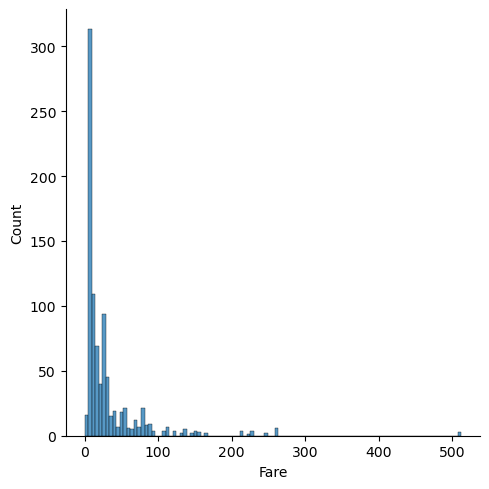

In [7]:
sns.displot(data=traindata,x="Fare")

In [8]:
testdata.isnull().sum()/len(testdata)*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

<AxesSubplot:>

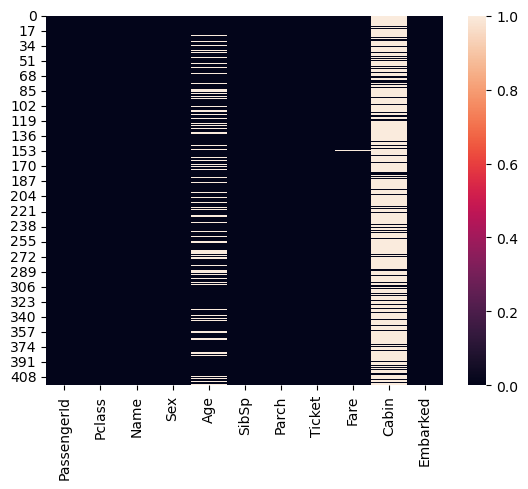

In [9]:
sns.heatmap(testdata.isnull())

In [10]:
traindata.drop(["Cabin","Name","Ticket"],axis = 1, inplace = True)
traindata

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [12]:
traindata["Sex"].unique()

array(['male', 'female'], dtype=object)

In [13]:
traindata["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [14]:
temp = lambda x:x.map({'S':0,'C':1,'Q':2})
traindata['Embarked'] = traindata[['Embarked']].apply(temp)
traindata.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0.0
1,2,1,1,female,38.0,1,0,71.2833,1.0
2,3,1,3,female,26.0,0,0,7.9250,0.0
3,4,1,1,female,35.0,1,0,53.1000,0.0
4,5,0,3,male,35.0,0,0,8.0500,0.0


In [15]:
traindata['Sex'] = label_encoder.fit_transform(traindata['Sex'])
traindata["Sex"].unique()

array([1, 0])

In [16]:
traindata['Embarked'] = label_encoder.fit_transform(traindata['Embarked'])
traindata["Embarked"].unique()

array([0, 1, 2, 3])

In [17]:
traindata.isnull().sum()/len(traindata)*100

PassengerId     0.00000
Survived        0.00000
Pclass          0.00000
Sex             0.00000
Age            19.86532
SibSp           0.00000
Parch           0.00000
Fare            0.00000
Embarked        0.00000
dtype: float64

In [18]:
traindata["Age"]=traindata["Age"].fillna(traindata["Age"].mean())
traindata.isnull().sum()/len(traindata)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [19]:
traindata

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


In [20]:
traindata = traindata.set_index("PassengerId")

In [21]:
X = traindata.drop("Survived",axis=1)
y = traindata["Survived"]

In [22]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,1,22.0,1,0,7.2500,0
2,1,0,38.0,1,0,71.2833,1
3,3,0,26.0,0,0,7.9250,0
4,1,0,35.0,1,0,53.1000,0
5,3,1,35.0,0,0,8.0500,0


In [23]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 7)
(623,)
(268, 7)
(268,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()


In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
knnpred = knn.predict(X_test)
dtreepred = dtree.predict(X_test)

In [31]:
print("Accuracy :",round(accuracy_score(y_test,knnpred)*100,2),"%")
print("Accuracy :",round(accuracy_score(y_test,dtreepred)*100,2),"%")

Accuracy : 73.13 %
Accuracy : 76.87 %


In [32]:
testdata.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
testdata = testdata.set_index("PassengerId")

In [34]:
testdata

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [35]:
testdata.isnull().sum()/len(testdata)*100

Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.239234
Cabin       78.229665
Embarked     0.000000
dtype: float64

In [36]:
testdata.drop(["Cabin","Name","Ticket"],axis = 1, inplace = True)

In [37]:
temp2 = lambda x:x.map({'S':0,'C':1,'Q':2})
testdata['Embarked'] = testdata[['Embarked']].apply(temp2)
testdata["Age"]=testdata["Age"].fillna(testdata["Age"].mean())
testdata["Fare"]=testdata["Fare"].fillna(testdata["Fare"].mean())
testdata['Sex'] = label_encoder.fit_transform(testdata['Sex'])

In [38]:
testdata.isnull().sum()/len(testdata)*100

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [39]:
testdata

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.50000,0,0,7.8292,2
893,3,0,47.00000,1,0,7.0000,0
894,2,1,62.00000,0,0,9.6875,2
895,3,1,27.00000,0,0,8.6625,0
896,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
1305,3,1,30.27259,0,0,8.0500,0
1306,1,0,39.00000,0,0,108.9000,1
1307,3,1,38.50000,0,0,7.2500,0


In [40]:
pred = dtree.predict(testdata)

In [41]:
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [42]:
result = pd.DataFrame()
result["PassengerId"] = testdata.index
result["Survived"] = pred

In [43]:
result = result.set_index("PassengerId")

In [44]:
result.to_csv("/kaggle/working/submission.csv")

In [45]:
result

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0
...,...
1305,0
1306,1
1307,0
